## data_io module

Test Axolotl Data for Spateo

Injury_15DPI_rep3_FP200000266TR_E3.Gene_Expression_table.tsv.gz:

- Raw Stereo-seq data.


Injury_15DPI_rep3_FP200000266TR_E3_cell_segmentation.tsv.gz:

- Stereo-seq data after cell segmentation. 
    A column, namely `cell`, representing the cell ID was added.

Injury_15DPI_rep3_FP200000266TR_E3_cell_segmentation.npy
- The cell segmentation label matrix with the shape of N*N. 
- Contains information about cell segmentation. 
    Each value of the matrix represents which cell the DNB belongs to at this coordinate.
    (0 representing the background)
- Class is `numpy.ndarray`.

Injury_15DPI_rep3_FP200000266TR_E3_ssDNA.jpg

- Processed ssDNA staining image.
- The image has been pre-processed by registration and background removal.
- The scale is 1. (One DNB corresponds to one pixel)

In [1]:
import sys
sys.path.append(r'D:\Backup\Documents\GitHub\spateo-release')
import spateo

In [2]:
print(spateo.readBGI.__doc__)

A helper function that facilitates constructing an AnnData object suitable for downstream spateo analysis

    Parameters
    ----------
        filename: `str`
            A string that points to the directory and filename of spatial transcriptomics dataset, produced by the
            stereo-seq method from BGI.
        binsize: `int` (default: 50)
            The number of spatial bins to aggregate RNAs captured by DNBs in those bins. Usually this is 50, which is
            close to 25 uM.
        slice: `str` or None (default: None)
            Name of the slice. Will be used when displaying multiple slices.
        label_path: `str` or None (default: None)
            A string that points to the directory and filename of cell segmentation label matrix(Format:`.npy`).
            If not None, the results of cell segmentation will be used, and param `binsize` will be ignored.
        version: `str`
            The version of technology. Currently not used. But may be useful when th

In [3]:
# readBGI by bins
obj_bin50 = spateo.readBGI(
    filename = r'F:\data\042.INTRONIC\00.data\Injury_15DPI_rep3_FP200000266TR_E3\Injury_15DPI_rep3_FP200000266TR_E3.Gene_Expression_table.tsv.gz',
    binsize = 50,
    slice = 'Injury_15DPI_rep3_FP200000266TR_E3',
    version = 'stereo_v1',
)
obj_bin50

AnnData object with n_obs × n_vars = 10840 × 34484
    obs: 'contours', 'area', 'slice'
    obsm: 'spatial'

In [4]:
# geopandas
type(obj_bin50.obs)

geopandas.geodataframe.GeoDataFrame

In [5]:
obj_bin50.obs.head()

,contours,area,slice
cell_name,,,
18_43,"POLYGON ((900.000 2150.000, 950.000 2150.000, ...",2500,Injury_15DPI_rep3_FP200000266TR_E3
49_22,"POLYGON ((2450.000 1100.000, 2500.000 1100.000...",2500,Injury_15DPI_rep3_FP200000266TR_E3
60_36,"POLYGON ((3000.000 1800.000, 3050.000 1800.000...",2500,Injury_15DPI_rep3_FP200000266TR_E3
75_83,"POLYGON ((3750.000 4150.000, 3800.000 4150.000...",2500,Injury_15DPI_rep3_FP200000266TR_E3
90_26,"POLYGON ((4500.000 1300.000, 4550.000 1300.000...",2500,Injury_15DPI_rep3_FP200000266TR_E3


<AxesSubplot:>

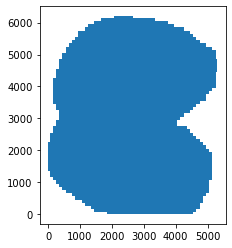

In [6]:
obj_bin50.obs.plot()

In [ ]:
# readBGI by segmentated label
obj_cells = spateo.readBGI(
    filename = r'F:/data/042.INTRONIC/00.data/Injury_15DPI_rep3_FP200000266TR_E3/Injury_15DPI_rep3_FP200000266TR_E3_cell_segmentation.tsv.gz',
    binsize = 50, # will be ignored
    label_path = r'F:/data/042.INTRONIC/00.data/Injury_15DPI_rep3_FP200000266TR_E3/Injury_15DPI_rep3_FP200000266TR_E3_cell_segmentation.npy',
    slice = 'Injury_15DPI_rep3_FP200000266TR_E3',
    version = 'stereo_v1',
)
obj_cells

In [ ]:
# plot by area
obj_cells.obs.plot('area', figsize=(50,50))

In [ ]:
# read_image
print(spateo.read_image.__doc__)

In [ ]:
obj_cells = spateo.read_image(
    adata = obj_cells,
    filename = r'F:/data/042.INTRONIC/00.data/Injury_15DPI_rep3_FP200000266TR_E3/Injury_15DPI_rep3_FP200000266TR_E3_ssDNA.jpg',
    scale_factor = 1.0,
    slice = 'Injury_15DPI_rep3_FP200000266TR_E3',
    img_layer = 'ssDNA2'
)
obj_cells.uns['spatial']['Injury_15DPI_rep3_FP200000266TR_E3'].keys()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(obj_cells.uns['spatial']['Injury_15DPI_rep3_FP200000266TR_E3']['images']['ssDNA2'])